# ***P220***


In [25]:
import pandas as pd
wine=pd.read_csv('http://bit.ly/wine_csv_data')
wine.info()#데이터 타입과 누락된 데이터가 있는지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [26]:
wine.describe()#다양한 통계값

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [27]:
data=wine[['alcohol','sugar','pH']].to_numpy()
target=wine['class'].to_numpy()
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(data,target,test_size=0.2,random_state=42)#데이터 전처리 과정 훈련세트와 테스트 세트로 나누고 특성을 표준화 하기
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)
from sklearn.linear_model import LogisticRegression#변환된 데이터를 사용해 로지스틱 회귀모델을 훈련
lr=LogisticRegression()
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))#훈련값과 테스트 값
print(lr.score(test_scaled,test_target))

0.7808350971714451
0.7776923076923077


In [28]:
print(lr.coef_,lr.intercept_)#학습한 계수와 절편

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


In [29]:
from sklearn.tree import DecisionTreeClassifier#결정트리
dt=DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.996921300750433
0.8592307692307692


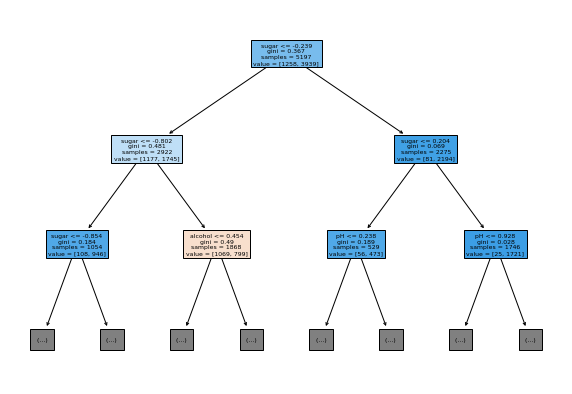

In [30]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt,max_depth=2,filled=True,feature_names=['alcohol','sugar','pH'])#계산된 결정트리함수의 결과중 2번째까지만 출력 (실제로는 엄청길게 트리값이 나열되어있음 그중에 2개만 보는것)
plt.show()


0.8454877814123533
0.8415384615384616


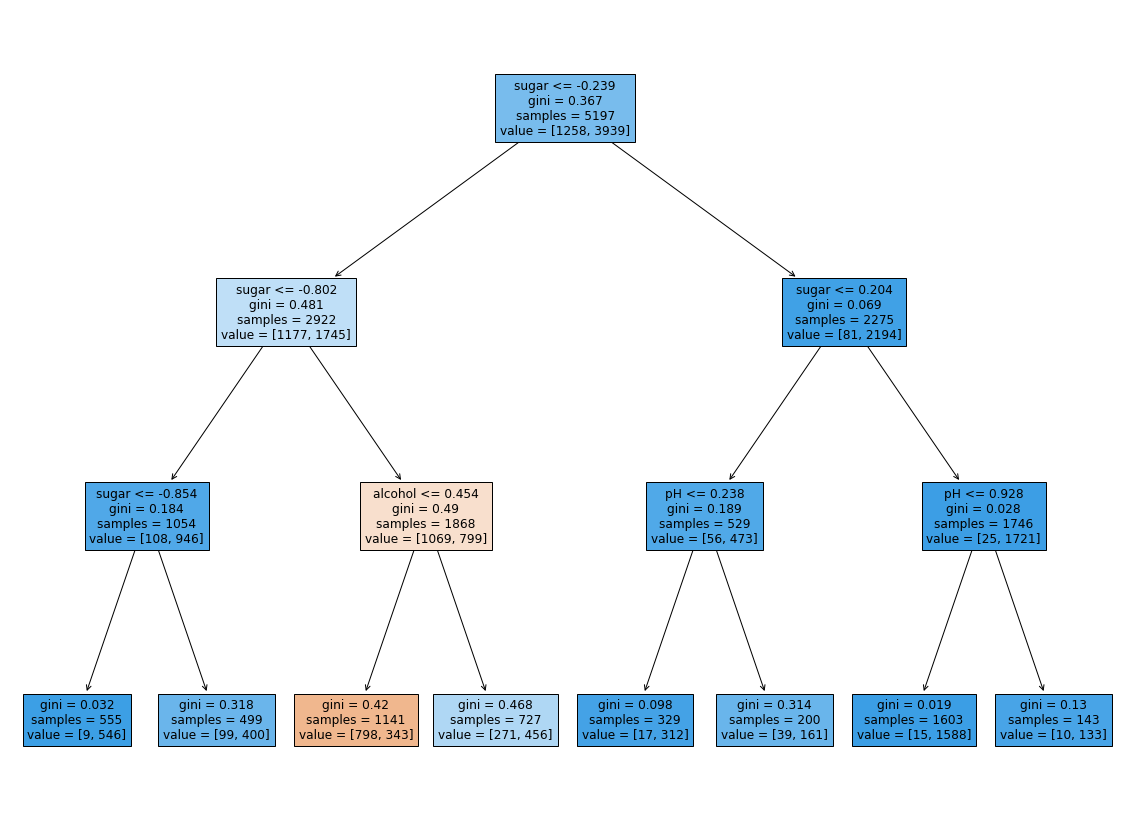

In [31]:
dt=DecisionTreeClassifier(max_depth=3,random_state=42)#3번째 가지에서 훈련 종료되는 모델 을 출력하여 그래프로 표현하기
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

0.8454877814123533
0.8415384615384616


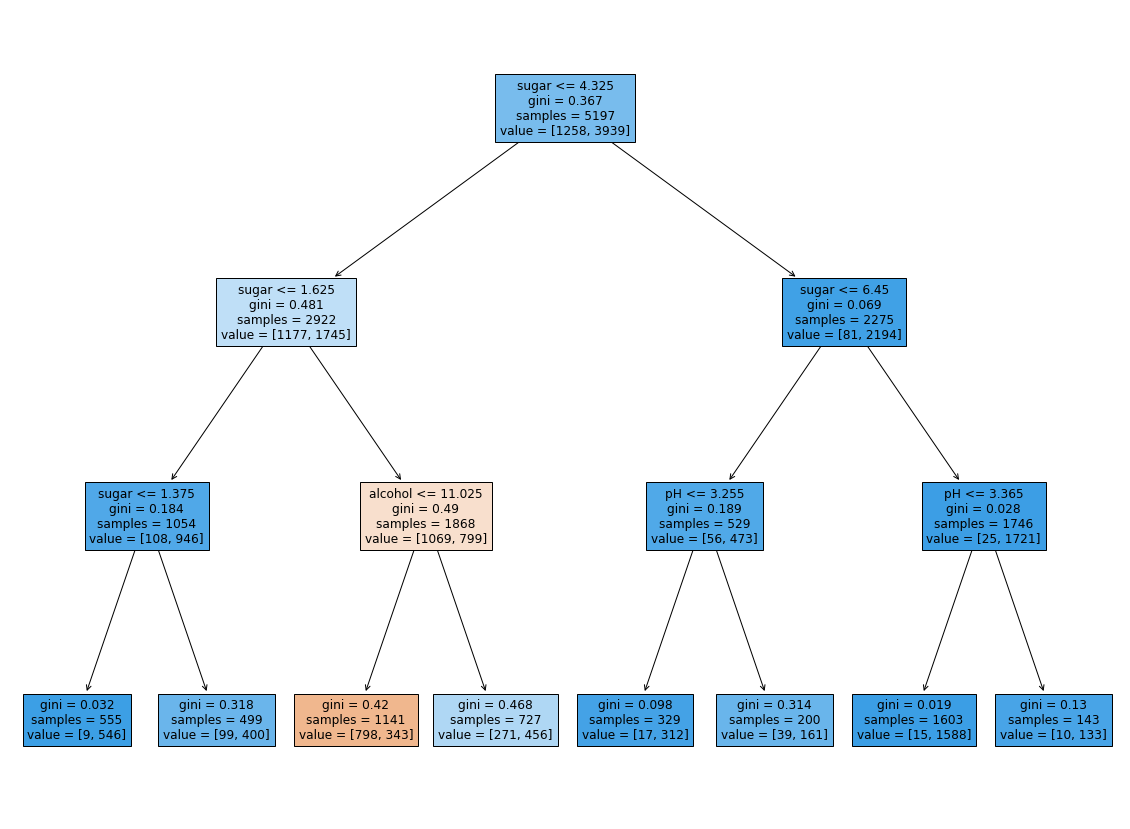

In [32]:
dt=DecisionTreeClassifier(max_depth=3,random_state=42)#불순도 관련된 내용은 교재 P230을 참조
dt.fit(train_input,train_target)
print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

In [33]:
print(dt.feature_importances_)#특성값중 중요도가 높은 특성값 찾아보기 1번째 특성:sugar 가 가장 중요도가 높게 나옴

[0.12345626 0.86862934 0.0079144 ]


0.8874350586877044
0.8615384615384616


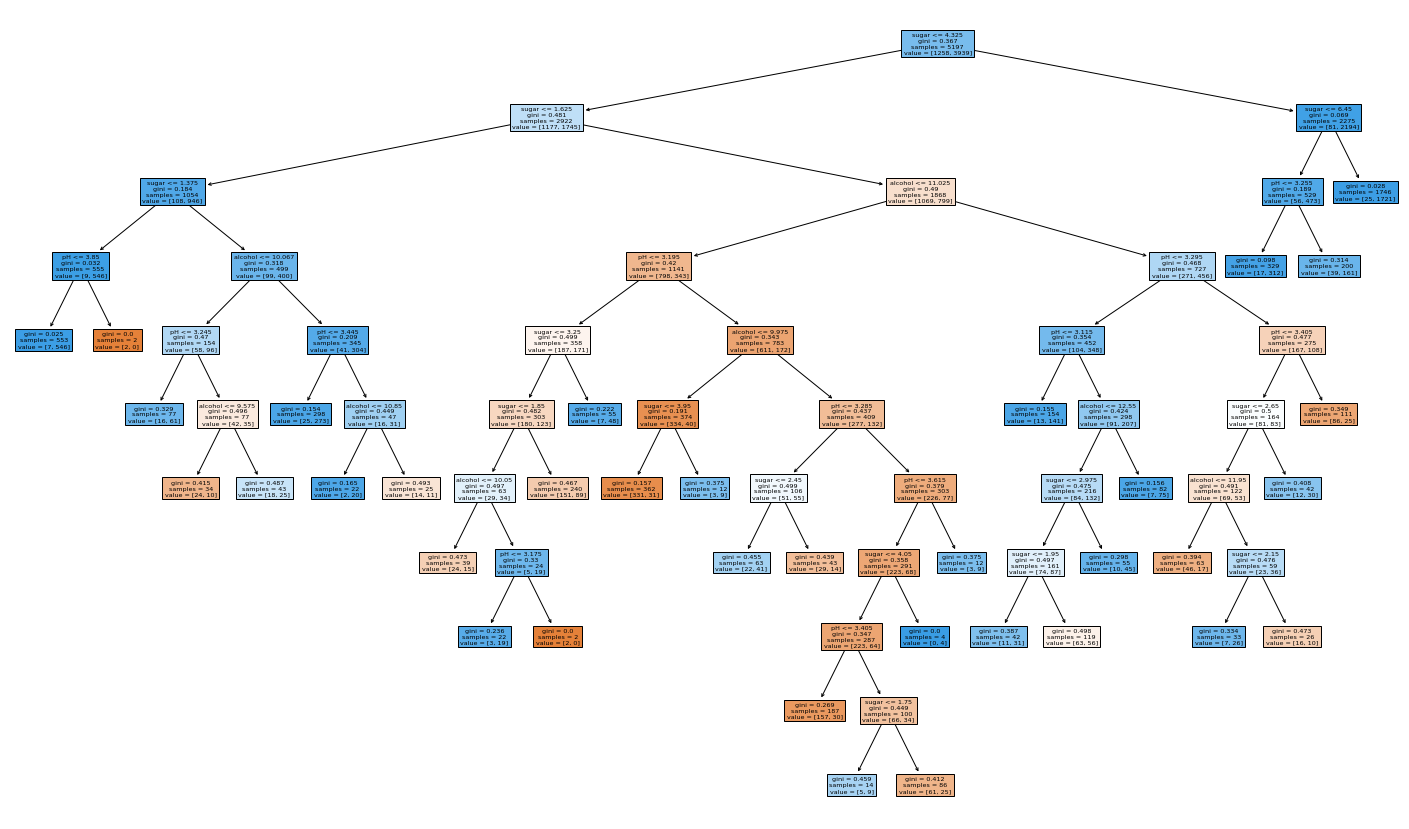

In [38]:
dt=DecisionTreeClassifier(min_impurity_decrease=0.0005,random_state=42)#min_impurity_decrease 값: 설정한 값보다 작으면(더이상 분활할 의미가 없어지면)가지치기를 하지않게 해주는 매개변수(하이퍼파라미터)
dt.fit(train_input,train_target)
print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))
plt.figure(figsize=(25,15))
plot_tree(dt,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()